# DATA SCIENTIST PROFESSIONAL

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mnso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import the dataset

In [7]:
df = pd.read_csv('recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


# Data Validation:
The original dataset has _**947 rows and 8 columns**_. After validating the data on each column, I made some changes as below.


- Recipe: 947 unique values, similar to the description. After data cleaning, 52 rows were removed because of the missing values from other columns.

- Calories: 895 non-null values, similar to the description. 52 missing values were replaced by the average value of the "calories" column grouped by "category" and "servings".
- Carbohydrate: 895 non-null values, similar to the description. 52 missing values were replaced by the average value of the "carbohydrate" column grouped by "category" and "servings".
- Sugar: 895 non-null values, similar to the description. 52 missing values were replaced by the average value of the "sugar" column grouped by "category" and "servings".
- Protein: 895 non-null values, similar to the description. 52 missing values were replaced by the average value of the "protein" column grouped by "category" and "servings".

- Category: 11 unique categories without missing values instead of 10 categories provided by the description. I merged category _**Chicken Breast**_ into category _**Chicken**_ because they belong to the same category.

- Servings: 6 unique categories without missing values. According to the description, _**servings**_ must be a numeric column, not a character column. Two extra categories _**4 as a snack**_ and _**6 as a snack**_ were merged into 4 and 6, respectively. The column type was changed to integer

- High-traffic: 1 unique category, similar to the description. 373 the missing values were already replaced with Low.

# Data Cleaning:

_ Remove rows with null values in calories, carbohydrate, sugar and protein to maintain data integrity.

_ In the Category column: "Chicken Breast" category was united with the "Chicken" category to ensure consistency.

_ In the Servings column: Extra values "4 as a snack" and "6 as a snack" were united with "4" and "6," respectively, and the column type was changed to integer.

_ In the high-traffic column: Replace null values with "Low".

Furthermore, I created four more columns that illustrate the total nutrients of each recipe.

After validating and cleaning, the dataset has _**895 rows and 11 columns**_ remaining.

## Overview the dataset

In [8]:
df.shape
print("The dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataset has 947 rows and 8 columns


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [10]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


## Categorical columns:

In [11]:
num_unique_objects = df.select_dtypes(include='object').nunique()
unique_values = df.select_dtypes(include='object').apply(lambda x: x.unique())
num_unique_objects, unique_values

(category        11
 servings         6
 high_traffic     1
 dtype: int64,
 category        [Pork, Potato, Breakfast, Beverages, One Dish ...
 servings                 [6, 4, 1, 2, 4 as a snack, 6 as a snack]
 high_traffic                                          [High, nan]
 dtype: object)

### Column Category:

In [12]:
df.category.value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

According to the description, there are only 10 categories. But in the original dataset, the extra category _**Chicken Breast**_ were also recorded. Therefore, I will replace that category with _**Chicken**_

In [13]:
df['category'] = df['category'].replace('Chicken Breast', 'Chicken')
df.category.value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

### Column Servings:

In [14]:
df.servings.value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

For column servings, they used to have inconsistent data. Therefore, I changed _**4 as a snack**_ and _**6 as a snack**_ into 4 and 6, respectively.
I also changed the _**servings**_ column to numeric type

In [15]:
df['servings'] = df['servings'].str.extract(r'(\d+)')
df.servings.value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [16]:
df['servings'] = df['servings'].astype('int')

### Column high_traffic:

In [17]:
df.high_traffic.value_counts(dropna=False)

High    574
NaN     373
Name: high_traffic, dtype: int64

- For column high_traffic, 373 missing values are understood as Low traffic. Therefore, I replaced missing values with "Low"

In [18]:
df['high_traffic'] = df['high_traffic'].fillna("Low")
df.high_traffic.value_counts()

High    574
Low     373
Name: high_traffic, dtype: int64

## Numerical columns:

Number of missing values in the dataset

In [19]:
df.isnull().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

<AxesSubplot: >

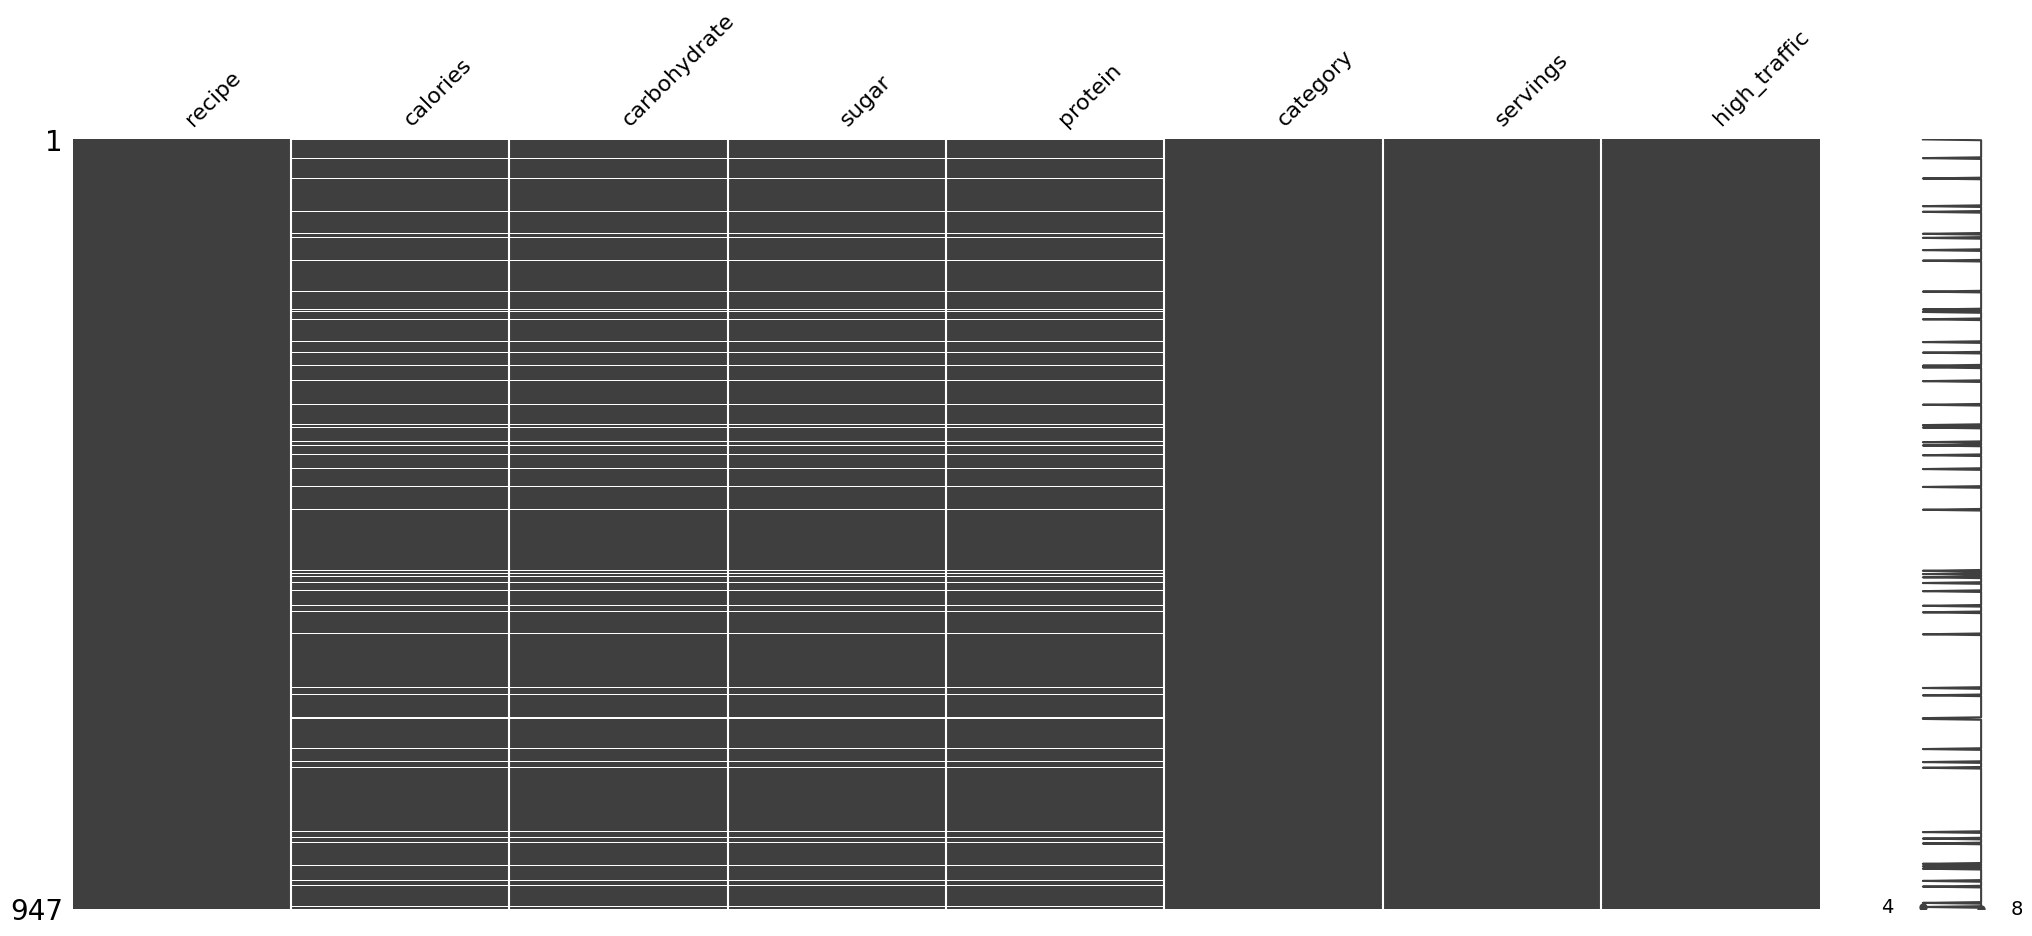

In [20]:
mnso.matrix(df)

<AxesSubplot: >

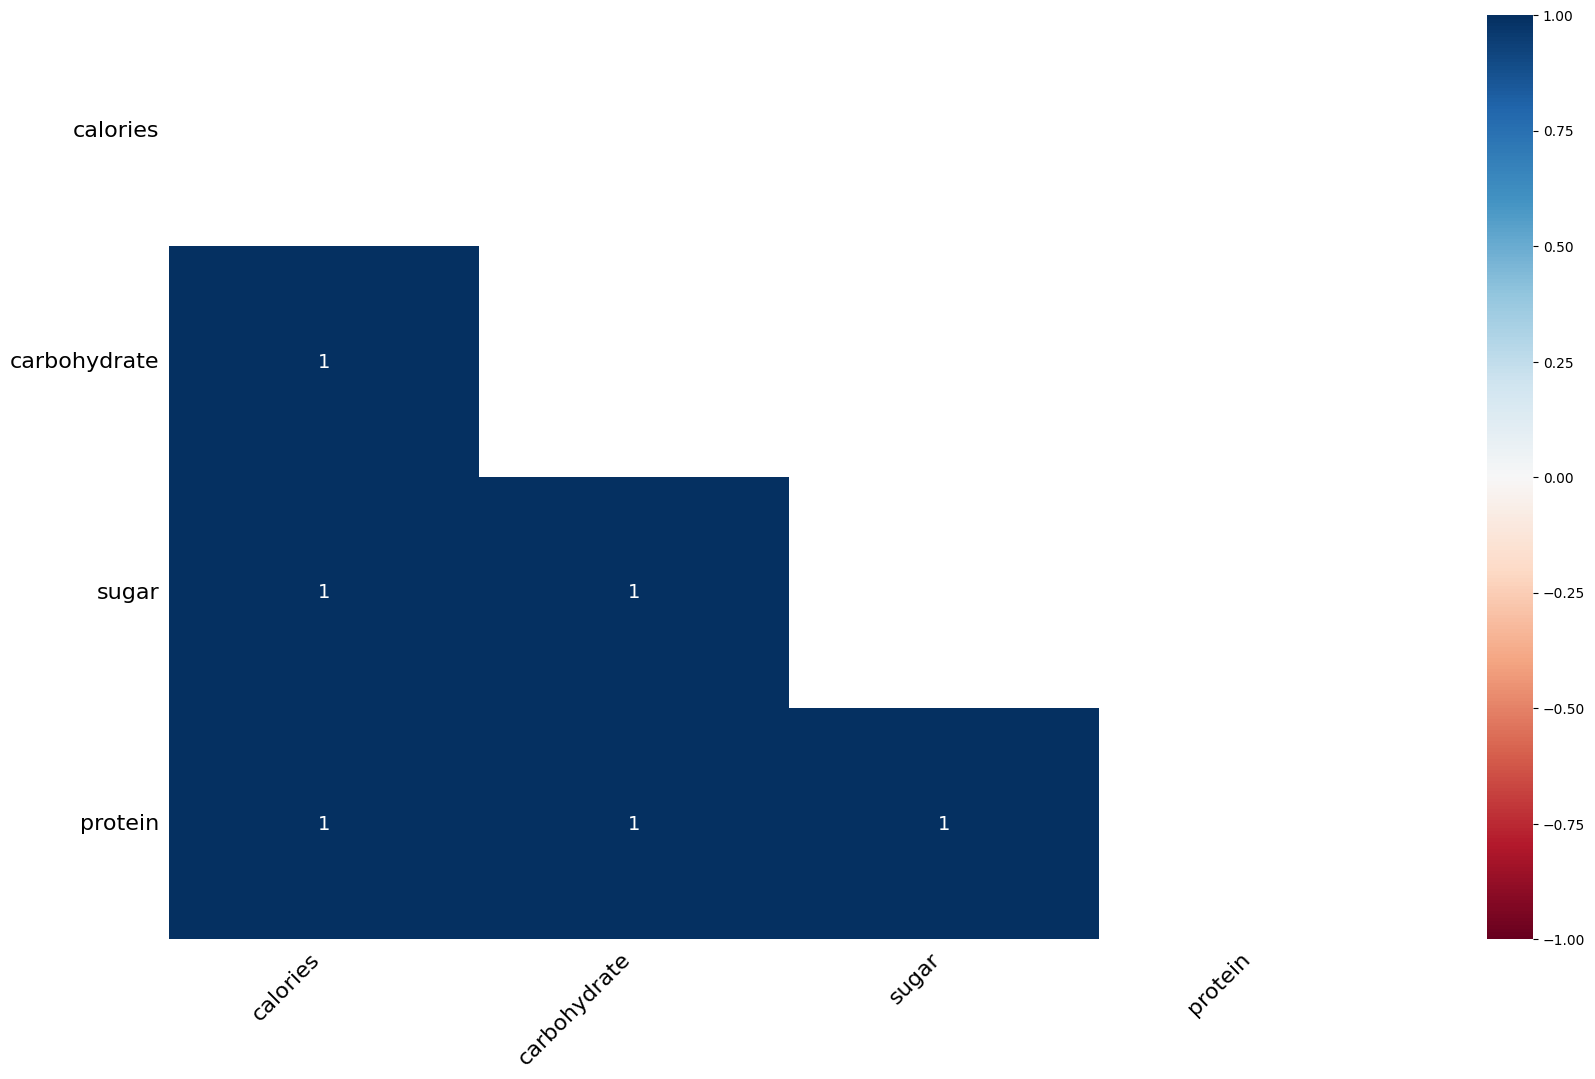

In [21]:
mnso.heatmap(df)

In [22]:
missing_values = df[df.isnull().any(axis=1)]
missing_values

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
23,24,NaN,NaN,NaN,NaN,Meat,2,Low
48,49,NaN,NaN,NaN,NaN,Chicken,4,Low
82,83,NaN,NaN,NaN,NaN,Meat,4,High
89,90,NaN,NaN,NaN,NaN,Pork,6,High
116,117,NaN,NaN,NaN,NaN,Chicken,6,High
121,122,NaN,NaN,NaN,NaN,Dessert,2,High
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,High
149,150,NaN,NaN,NaN,NaN,Potato,2,High
187,188,NaN,NaN,NaN,NaN,Pork,4,High


In [23]:
percent_missing = (missing_values.isnull().sum() / len(df)) * 100
percent_missing

recipe          0.000000
calories        5.491024
carbohydrate    5.491024
sugar           5.491024
protein         5.491024
category        0.000000
servings        0.000000
high_traffic    0.000000
dtype: float64

We can see that all the remaining missing data from these columns (calories, carbohydrate, sugar, protein) are on the same row.
These rows also account for 5.8% of the dataset.

Therefore, we will delete these missing values.

In [24]:
df.dropna(axis=0, inplace=True)
df.shape

(895, 8)

In case we want to impute the missing values, we will fill them with mean of column value group by category and servings

In [25]:
nutritions = ['calories','carbohydrate','sugar','protein']
for col in nutritions:
    df[col] = df[col].fillna(df.groupby(['category','servings'])[col].transform('mean'))

## Further data cleaning steps:

### Drop column recipe:
We will drop the column recipe because recipe is just the ID of the recipe and won't help us with further analysis

In [26]:
df.drop('recipe', axis=1, inplace=True)

### Check negative number and duplicated values:

In [27]:
df.describe()

,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000
mean,435.939196,35.069676,9.046547,24.149296,3.458101
std,453.020997,43.949032,14.679176,36.369739,1.735979
min,0.140000,0.030000,0.010000,0.000000,1.000000
25%,110.430000,8.375000,1.690000,3.195000,2.000000
50%,288.550000,21.480000,4.550000,10.800000,4.000000
75%,597.650000,44.965000,9.800000,30.200000,4.000000
max,3633.160000,530.420000,148.750000,363.360000,6.000000


The dataset doesn't have any negative values

In [28]:
# Check number of duplicate values
num_duplicates = df.duplicated().sum()
num_duplicates

0

Good news !!! The dataset doesn't have any duplicate values

### Add more columns for data visualization:
According to the description, all the nutrients of each recipe were calculated per serving. Therefore, I created four more columns to illustrate the total amount of nutrients of each recipe.

In [29]:
for i in nutritions:
    df['total_'+i] = df[i] * df['servings']
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,total_calories,total_carbohydrate,total_sugar,total_protein
1,35.48,38.56,0.66,0.92,Potato,4,High,141.92,154.24,2.64,3.68
2,914.28,42.68,3.09,2.88,Breakfast,1,Low,914.28,42.68,3.09,2.88
3,97.03,30.56,38.63,0.02,Beverages,4,High,388.12,122.24,154.52,0.08
4,27.05,1.85,0.80,0.53,Beverages,4,Low,108.20,7.40,3.20,2.12
5,691.15,3.46,1.65,53.93,One Dish Meal,2,High,1382.30,6.92,3.30,107.86


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 1 to 946
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   calories            895 non-null    float64
 1   carbohydrate        895 non-null    float64
 2   sugar               895 non-null    float64
 3   protein             895 non-null    float64
 4   category            895 non-null    object 
 5   servings            895 non-null    int64  
 6   high_traffic        895 non-null    object 
 7   total_calories      895 non-null    float64
 8   total_carbohydrate  895 non-null    float64
 9   total_sugar         895 non-null    float64
 10  total_protein       895 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 83.9+ KB


# Data Visualization:

The product manager wants us to predict the traffic status of the recipe. Therefore, I choose _**high_traffic**_ column as the target variable

## Target variable: High Traffic

Text(0.5, 0, 'Traffic Status')

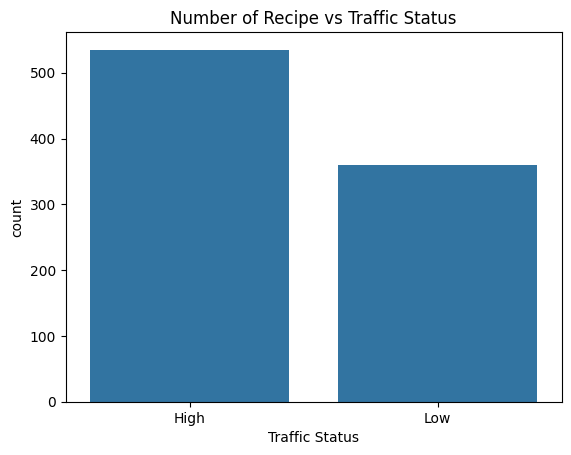

In [31]:
sns.countplot(data=df, x='high_traffic')
plt.title("Number of Recipe vs Traffic Status")
plt.xlabel("Traffic Status")

In [32]:
high, low = df['high_traffic'].value_counts()
high_pro, low_pro = df['high_traffic'].value_counts(normalize=True)

print('Number of recipe labelled as high: ',high,' and it accounts for {} %.'.format(round(high_pro*100,2)))
print('Number of recipe labelled as low: ',low,' and it accounts for {} %.'.format(round(low_pro*100,2)))


Number of recipe labelled as high:  535  and it accounts for 59.78 %.
Number of recipe labelled as low:  360  and it accounts for 40.22 %.


According to the graph above, there are 535 recipes labeled as high traffic accounting for 59.78%, while there are 360 recipes labeled as low traffic taking up 40.22%. The high-traffic recipes are higher than the low-traffic recipes

## Categorical columns:

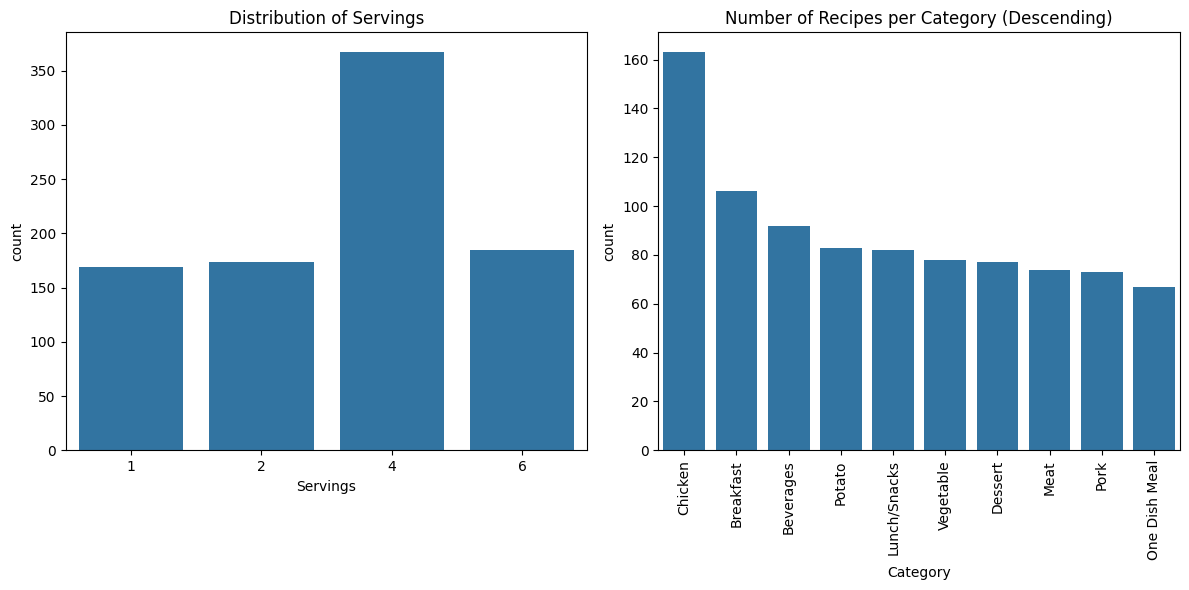

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot for servings
sns.countplot(data=df, x='servings', ax=axes[0])
axes[0].set_title("Distribution of Servings")
axes[0].set_xlabel("Servings")

# Countplot for category (sorted descending)
category_counts = df['category'].value_counts().sort_values(ascending=False)
sns.countplot(data=df, x='category', order=category_counts.index, ax=axes[1])
axes[1].set_title("Number of Recipes per Category (Descending)")
axes[1].set_xlabel("Category")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

The graphs above describe the occurrence of servings and categories, respectively.
- Most of the recipes are served for four people.
- Chicken is the main category reported.

In [34]:
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic,total_calories,total_carbohydrate,total_sugar,total_protein
1,35.48,38.56,0.66,0.92,Potato,4,High,141.92,154.24,2.64,3.68
2,914.28,42.68,3.09,2.88,Breakfast,1,Low,914.28,42.68,3.09,2.88
3,97.03,30.56,38.63,0.02,Beverages,4,High,388.12,122.24,154.52,0.08
4,27.05,1.85,0.80,0.53,Beverages,4,Low,108.20,7.40,3.20,2.12
5,691.15,3.46,1.65,53.93,One Dish Meal,2,High,1382.30,6.92,3.30,107.86


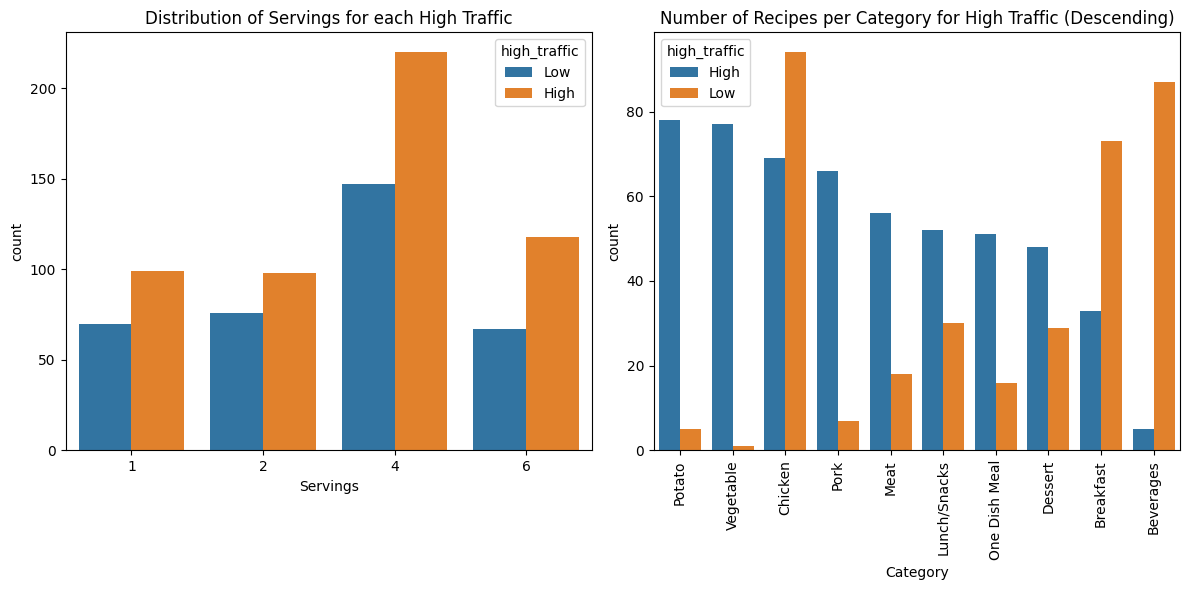

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot for servings for each high_traffic
sns.countplot(data=df, x='servings', hue='high_traffic', ax=axes[0])
axes[0].set_title("Distribution of Servings for each High Traffic")
axes[0].set_xlabel("Servings")

# Countplot for category for each high_traffic (sorted descending)
category_counts = df[df['high_traffic'] == 'High']['category'].value_counts().sort_values(ascending=False)
sns.countplot(data=df, x='category', hue='high_traffic',order=category_counts.index, ax=axes[1])
axes[1].set_title("Number of Recipes per Category for High Traffic (Descending)")
axes[1].set_xlabel("Category")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Two graphs above show us the relationship between the target variables - traffic and two categorical columns: servings and category.
- For traffic and servings: For each of serving, the amount of recipes with high traffic is higher than the amount of recipes with low traffic. No significant correlation between servings and high_traffic is seen. 
 
- For traffic and category: except for chicken, breakfast and beverage, high traffic recipes are always higher. Potato, Vegetable, Pork are the highest in high traffic recipes whereas those of low traffic are seen in Chicken, Breakfast, Beverages. 


## Numerical columns:

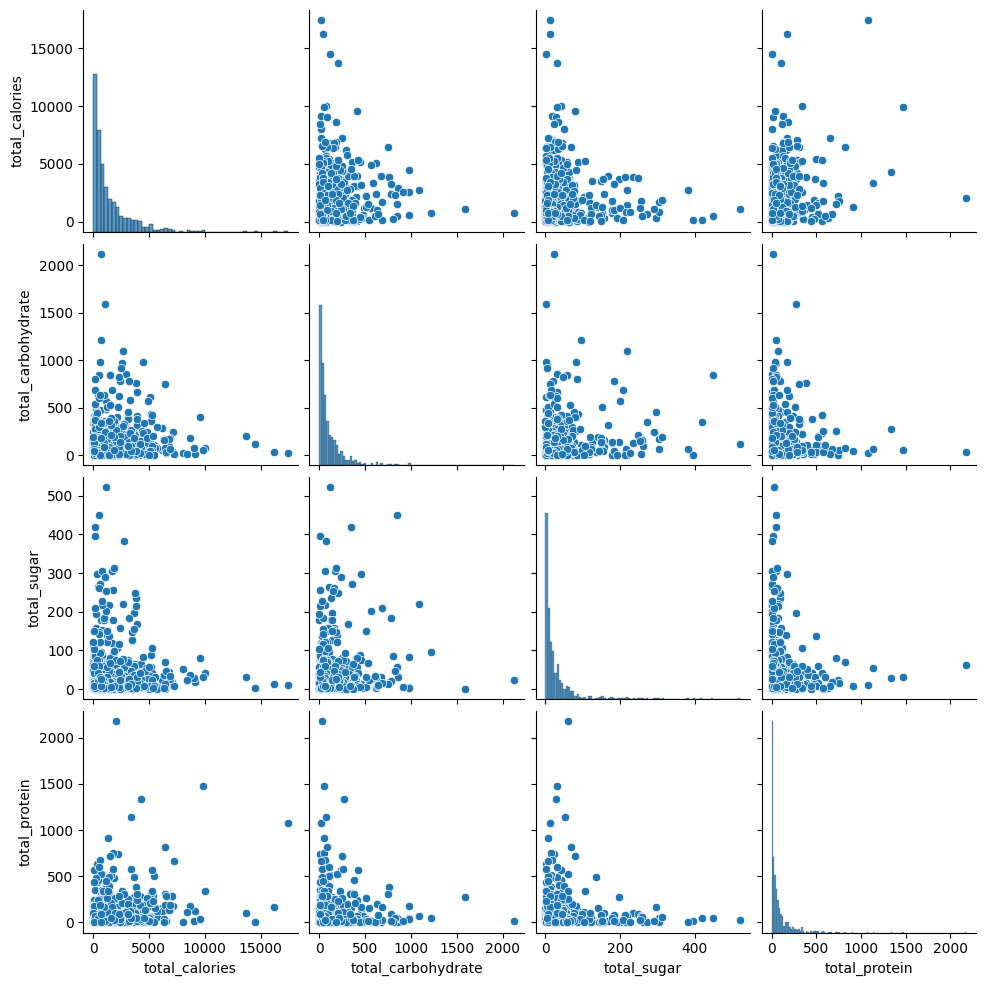

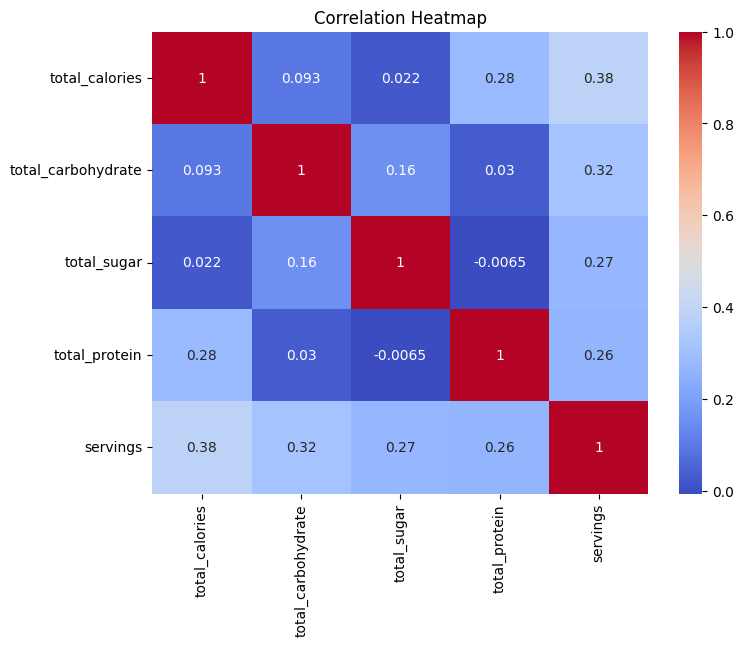

In [36]:
# Pairplot for total calories, total carbohydrate, total sugar, total protein
sns.pairplot(data=df, vars=['total_calories', 'total_carbohydrate', 'total_sugar', 'total_protein'])
# Heatmap for total calories, total carbohydrate, total sugar, total protein, and servings
plt.figure(figsize=(8, 6))
sns.heatmap(df[['total_calories', 'total_carbohydrate', 'total_sugar', 'total_protein', 'servings']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

From the pairplot and the heatmap, we can see that there is a moderate linear relationship between 5 variables.

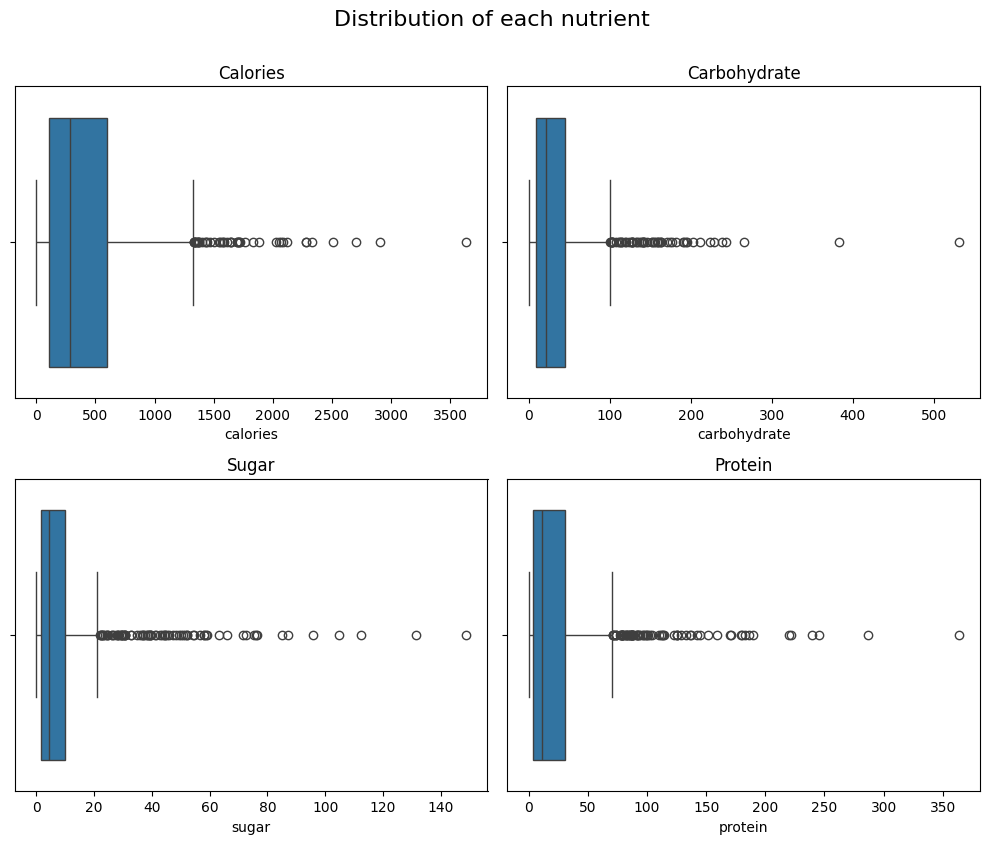

In [37]:
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Boxplot for calories
sns.boxplot(x=df['calories'], ax=axes[0, 0])
axes[0, 0].set_title('Calories')

# Boxplot for carbohydrate
sns.boxplot(x=df['carbohydrate'], ax=axes[0, 1])
axes[0, 1].set_title('Carbohydrate')

# Boxplot for sugar
sns.boxplot(x=df['sugar'], ax=axes[1, 0])
axes[1, 0].set_title('Sugar')

# Boxplot for protein
sns.boxplot(x=df['protein'], ax=axes[1, 1])
axes[1, 1].set_title('Protein')

# Adjust spacing between subplots
plt.tight_layout()
fig.suptitle('Distribution of each nutrient ',y=1.05,fontsize=16)
# Show the plot
plt.show()

These boxplot above let us know that the dataset doesn't have any outliers.

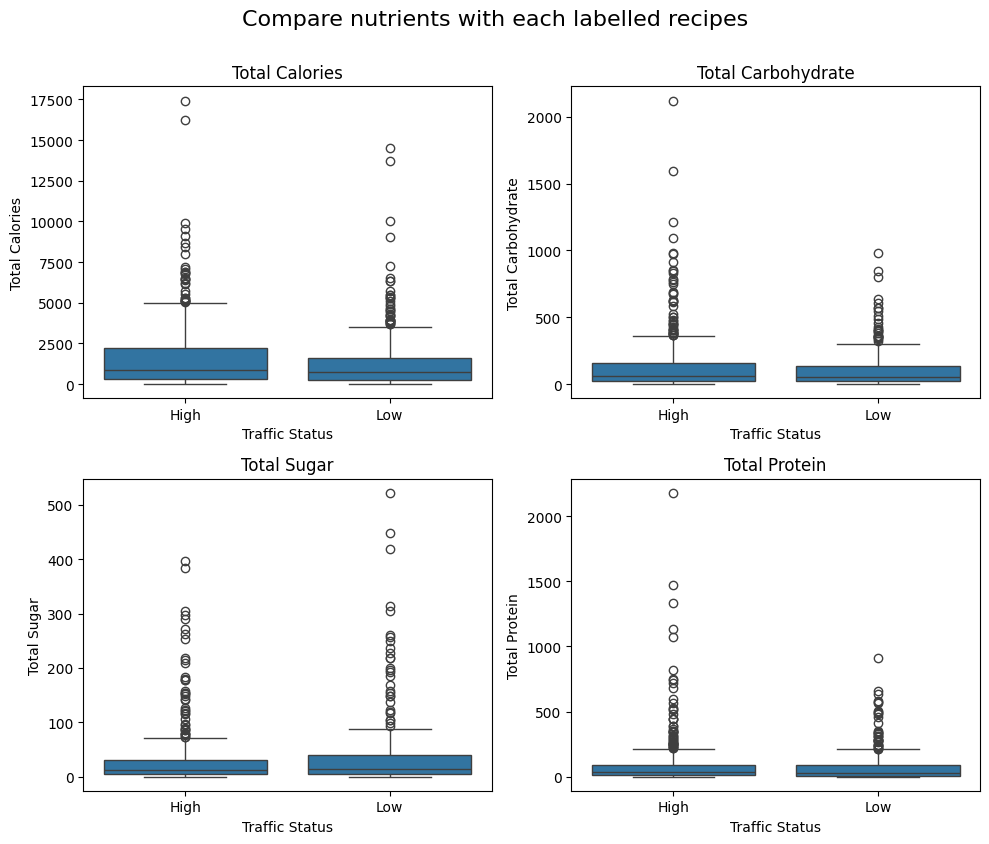

In [38]:
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Boxplot for total calories
sns.boxplot(x=df['high_traffic'], y=df['total_calories'], ax=axes[0, 0])
axes[0, 0].set_title('Total Calories')
axes[0, 0].set_xlabel('Traffic Status')
axes[0, 0].set_ylabel('Total Calories')

# Boxplot for total carbohydrate
sns.boxplot(x=df['high_traffic'], y=df['total_carbohydrate'], ax=axes[0, 1])
axes[0, 1].set_title('Total Carbohydrate')
axes[0, 1].set_xlabel('Traffic Status')
axes[0, 1].set_ylabel('Total Carbohydrate')

# Boxplot for total sugar
sns.boxplot(x=df['high_traffic'], y=df['total_sugar'], ax=axes[1, 0])
axes[1, 0].set_title('Total Sugar')
axes[1, 0].set_xlabel('Traffic Status')
axes[1, 0].set_ylabel('Total Sugar')

# Boxplot for total protein
sns.boxplot(x=df['high_traffic'], y=df['total_protein'], ax=axes[1, 1])
axes[1, 1].set_title('Total Protein')
axes[1, 1].set_xlabel('Traffic Status')
axes[1, 1].set_ylabel('Total Protein')

# Adjust spacing between subplots
plt.tight_layout()
fig.suptitle('Compare nutrients with each labelled recipes',y=1.05,fontsize=16)

# Show the plot
plt.show()

As we can see from the graph above, there are no major differences between the recipe with high traffic and the recipe with low traffic compared to the distribution of nutrients

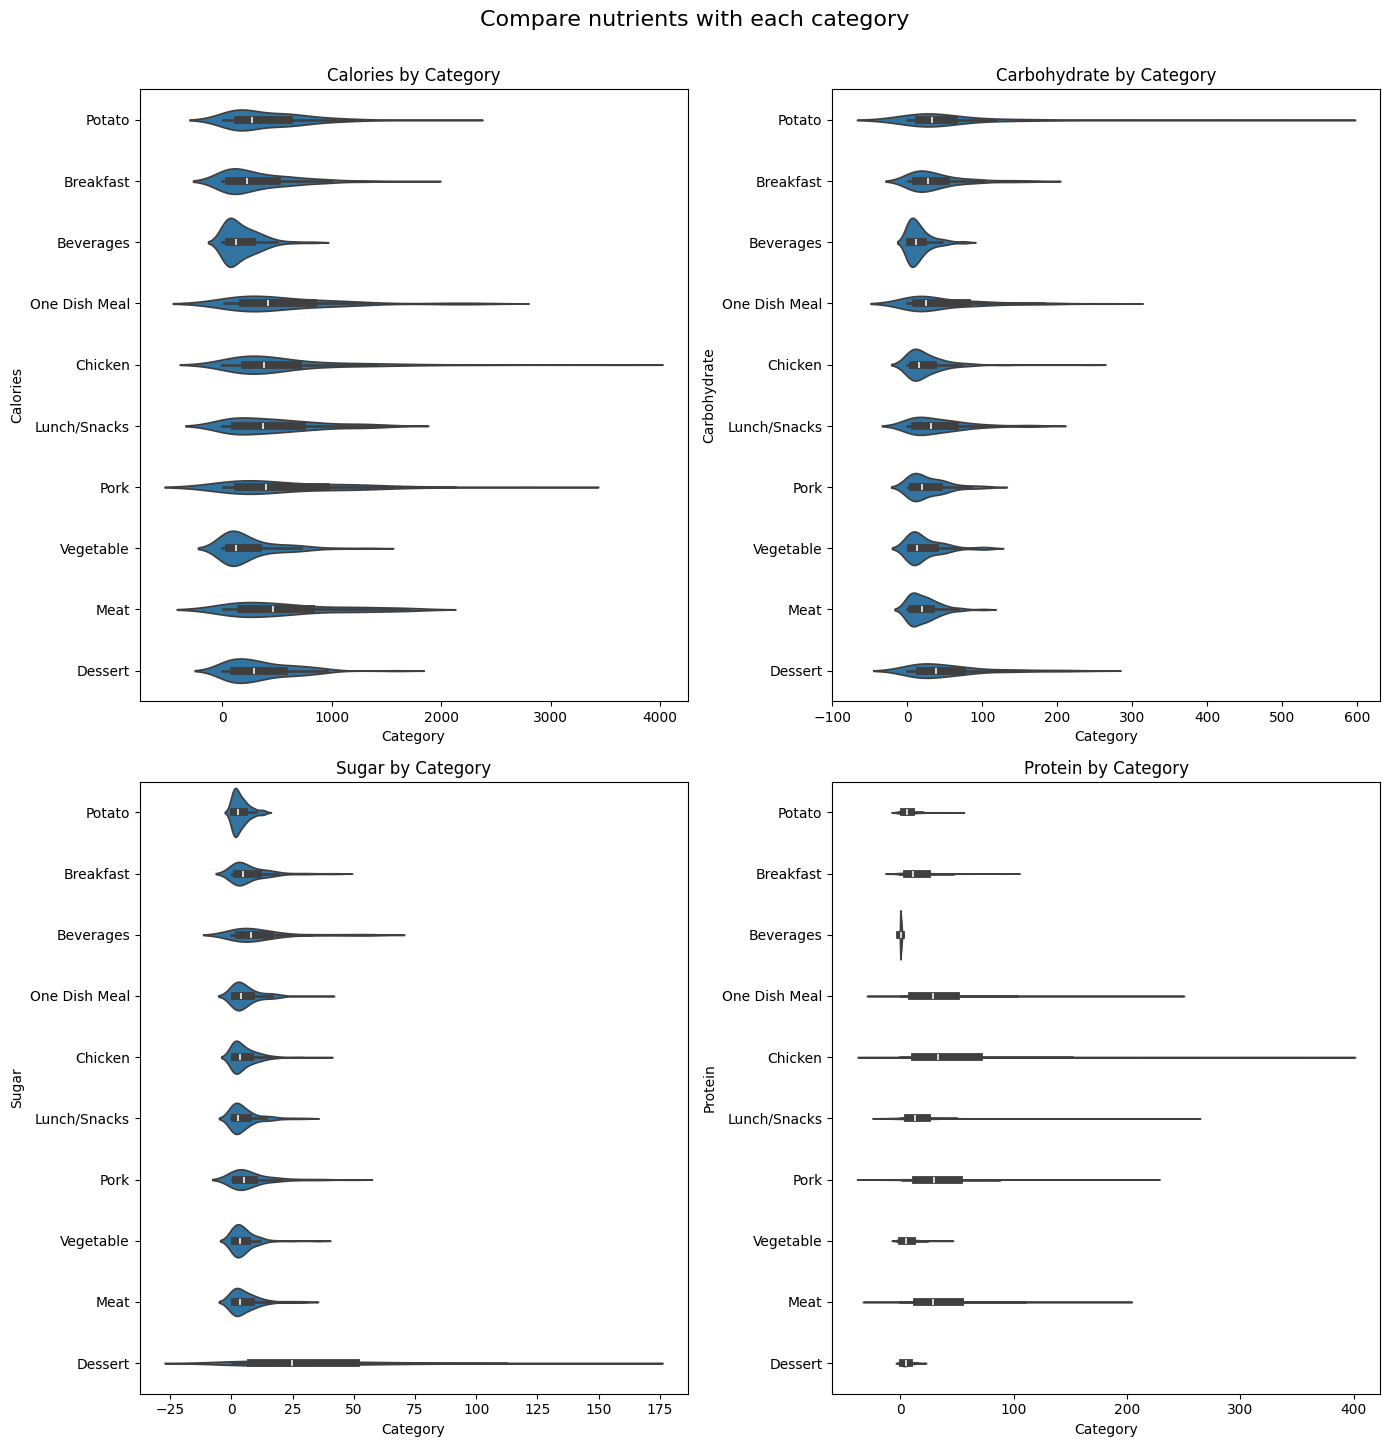

In [39]:
# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14,14))

# Violin plot for calories by category
sns.violinplot(y='category', x='calories', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Calories by Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Calories')

# Violin plot for carbohydrate by category
sns.violinplot(y='category', x='carbohydrate', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Carbohydrate by Category')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Carbohydrate')

# Violin plot for sugar by category
sns.violinplot(y='category', x='sugar', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Sugar by Category')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Sugar')

# Violin plot for protein by category
sns.violinplot(y='category', x='protein', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Protein by Category')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Protein')

# Adjust spacing between subplots
plt.tight_layout()
fig.suptitle('Compare nutrients with each category',y=1.03,fontsize=16)


# Show the plot
plt.show()

The category that contains the highest level of calories and Protein is Chicken then Pork and One Dish Meal
The category that contains the highest level of carbohydrate is Potato
The category that contains the highest level of Sugar is Dessert

# Model Fitting:
Predicting the high traffic is a binary classification problem.
I have selected two models
- The baseline model is Logistic Regression (a widely-used algorithm for binary classification)
- The comparison model I choose LinearSVC (A variant of Support Vector Machine for binary classification)

## Preprocessing model:
- Select features and target variables
- Split the data into training set and test set.
- Normalize the data.
- Convert categorical columns to numeric columns.

In [40]:
# Replace values in the "high_traffic" column
df["high_traffic"] = df["high_traffic"].replace({"High": 1, "Low": 0})

feature_num = ['calories','carbohydrate','sugar','protein','servings']

X = df[feature_num + ['category']]
y = df['high_traffic']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=29)

# Label the category column 
encode = LabelEncoder()
X_train['category'] = encode.fit_transform(X_train['category'])
X_test['category'] = encode.transform(X_test['category'])

# Display the category after label encoder
label_category = dict(zip(encode.classes_,range(len(encode.classes_))))
label_category

{'Beverages': 0,
 'Breakfast': 1,
 'Chicken': 2,
 'Dessert': 3,
 'Lunch/Snacks': 4,
 'Meat': 5,
 'One Dish Meal': 6,
 'Pork': 7,
 'Potato': 8,
 'Vegetable': 9}

In [41]:
# Normalize the data
scaler = StandardScaler()
X_train[feature_num] = scaler.fit_transform(X_train[feature_num])
X_test[feature_num] = scaler.transform(X_test[feature_num])

## Baseline model: Logistic Regression

In [42]:
# Create a Logistic Regression model
lr = LogisticRegression()

# Define hyperparameter grid for Logistic Regression
grid_lr = {'C':np.logspace(-3,3,7),
        'penalty':['l1','l2','elasticnet',None],
        'multi_class':['auto','ovr','multinomial']}

# Perform GridsearchCV with 10 folds
lr_cv = GridSearchCV(lr, param_grid=grid_lr, cv=10)

# Fit the model with training data
lr_cv.fit(X_train,y_train)

# Print the best params
print('Tuning hyperparameters for Logistic Regression: ', lr_cv.best_params_)

Tuning hyperparameters for Logistic Regression:  {'C': 0.001, 'multi_class': 'multinomial', 'penalty': 'l2'}


In [43]:
# Create a Logistic Regression model with the hyperparameter:
lr_tuning = LogisticRegression(C=0.001, multi_class='multinomial',penalty='l2')

# Fit and predict with the model
lr_tuning.fit(X_train,y_train)
y_pred_lr = lr_tuning.predict(X_test)

## Comparison model: Linear SVC

In [44]:
svc = LinearSVC()
grid_svc = {'C':np.logspace(-3,3,7),
           'penalty':['l1','l2'],
           'loss':['hinge','squared_hinge']}
svc_cv = GridSearchCV(svc, param_grid=grid_svc, cv=10)
svc_cv.fit(X_train,y_train)
print('Tuning hyperparameters for Logistic Regression: ', svc_cv.best_params_)

Tuning hyperparameters for Logistic Regression:  {'C': 0.1, 'loss': 'hinge', 'penalty': 'l2'}


In [45]:
svc_tuning = LinearSVC(C=0.1,loss='hinge',penalty='l2')
svc_tuning.fit(X_train,y_train)
y_pred_svc = svc_tuning.predict(X_test)

# Model Evaluation:
For this classification problem, I choose some metrics to evaluate between the two models.
- Precision: measures how often a model correctly predicts the positive class
- Recall: measures how often a model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. 
- F1 score: the harmonic mean of precision and recall. Therefore, gives us a balanced measure of both precision and recall.

By considering these metrics, we can better assess the performance of the model in predicting high-traffic recipes accurately.

In [46]:
print('Confusion matrix of Baseline model - Logistic Regression:')
print(confusion_matrix(y_test,y_pred_lr))
print('\n')
print('Classification report of Baseline model - Logistic Regression: ')
print(classification_report(y_test,y_pred_lr))

Confusion matrix of Baseline model - Logistic Regression:
[[ 73  25]
 [ 34 137]]


Classification report of Baseline model - Logistic Regression: 
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        98
           1       0.85      0.80      0.82       171

    accuracy                           0.78       269
   macro avg       0.76      0.77      0.77       269
weighted avg       0.79      0.78      0.78       269



In [47]:
print('Confusion matrix of Comparison model - LinearSVC:')
print(confusion_matrix(y_test,y_pred_svc))
print('\n')
print('Classification report of Comparison model - LinearSVC: ')
print(classification_report(y_test,y_pred_svc))

Confusion matrix of Comparison model - LinearSVC:
[[ 75  23]
 [ 41 130]]


Classification report of Comparison model - LinearSVC: 
              precision    recall  f1-score   support

           0       0.65      0.77      0.70        98
           1       0.85      0.76      0.80       171

    accuracy                           0.76       269
   macro avg       0.75      0.76      0.75       269
weighted avg       0.78      0.76      0.77       269



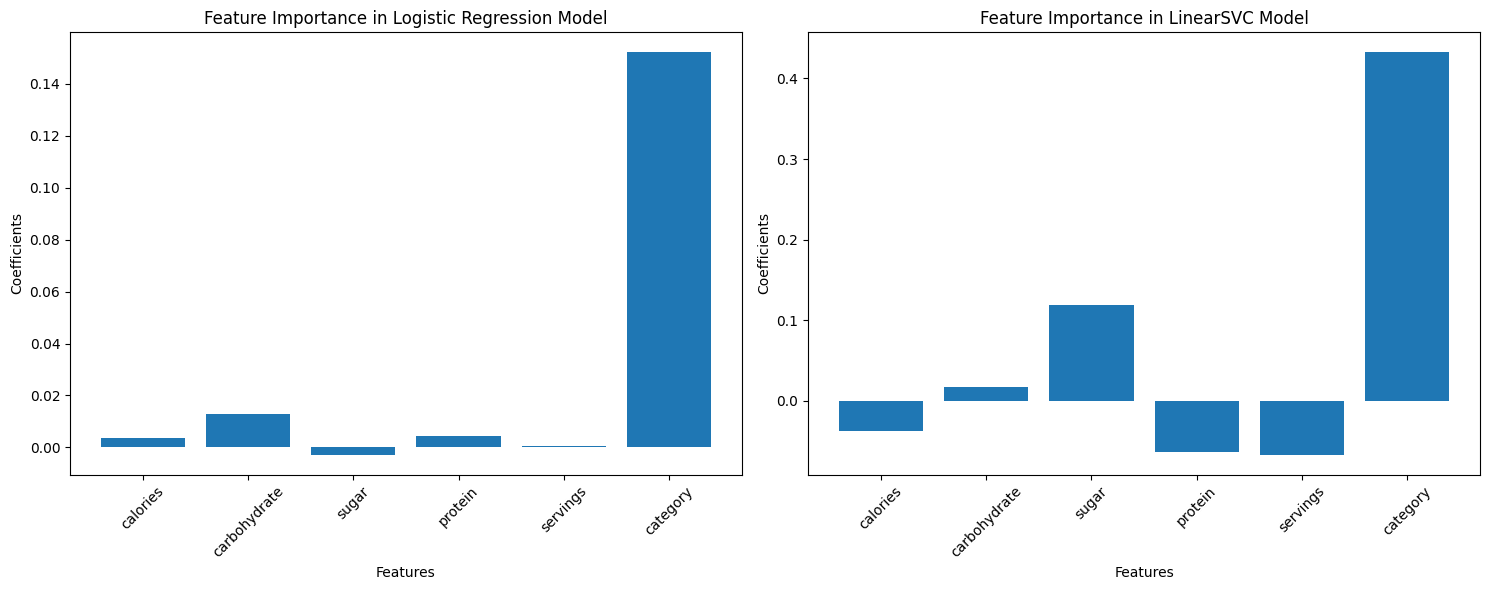

In [48]:
import matplotlib.pyplot as plt

# Get the coefficients and column names
coefficients_lr = lr_tuning.coef_[0]
coefficients_svc = svc_tuning.coef_[0]
columns = X.columns

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot the bar chart for Logistic Regression
axs[0].bar(columns, coefficients_lr)
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Coefficients')
axs[0].set_title('Feature Importance in Logistic Regression Model')
axs[0].tick_params(axis='x', rotation=45)

# Plot the bar chart for LinearSVC
axs[1].bar(columns, coefficients_svc)
axs[1].set_xlabel('Features')
axs[1].set_ylabel('Coefficients')
axs[1].set_title('Feature Importance in LinearSVC Model')
axs[1].tick_params(axis='x', rotation=45)

# Display the subplots
plt.tight_layout()
plt.show()

Both the Logistic Regression Model and LinearSVC worked well with the dataset. Both of them let us know that the category is the most effective feature for the high traffic.

We want to predict the high traffic (which is labeled as 1 as the replacing steps) so we will focus on Precision, Recall, and F1-score of value 1.

The precision, recall, and F1-score for value 1 of Logistic Regression are 0.85, 0.80, and 0.82 respectively, while these parameters of LinearSVC are 0.85, 0.76, and 0.80.

Therefore, the Logistic Regression fits the feature better and gives a lower prediction error than the Linear SVC model.

# Business Focus:
There are two primary business goals for this project:
- Predict which recipes will have high traffic.
- Predict the recipes high traffic with at least 80% probability.

According to the results, the Logistic Regression satisfied both business goals.
Its precision, recall and F1-score have values equal to or more than 80% probability.

Check the predictive system:

In [49]:
import random
random.seed(24)
random_recipe_index = random.randint(0, len(X_test) - 1)
random_recipe_features = X_test.iloc[random_recipe_index]

# Reshape the features to match the model's input shape
random_recipe_features = random_recipe_features.values.reshape(1, -1)

# Make the prediction using the Logistic Regression model
predicted_traffic = lr_tuning.predict(random_recipe_features)[0]
if predicted_traffic == 1:
    predicted_traffic_category = "High"
else:
    predicted_traffic_category = "Low"

# Get the actual traffic category from the test set
actual_traffic = y_test.iloc[random_recipe_index]
if actual_traffic == 1:
    actual_traffic_category = "High"
else:
    actual_traffic_category = "Low"

# Print the results
#print("Randomly Selected Recipe Features:")
#print(random_recipe_features)
print("\nPredicted Traffic Category: ", predicted_traffic_category)
print("Actual Traffic Category: ", actual_traffic_category)


Predicted Traffic Category:  High
Actual Traffic Category:  High


Looks good !!! The predicted value and actual value are matched

# Business Metrics:
The company wants to increase the accuracy of predicting high traffic.

Therefore, we would consider using the accuracy of predictions that predicted high traffic as a KPI to compare 2 models performance with the business criteria. The model that has a higher accuracy score will perform better.

In [50]:
# Accuracy score of Logistic Regression:
test_accuracy_lr = accuracy_score(y_test,y_pred_lr)

# Accuracy score of LinearSVC:""
test_accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Accuracy score when using Logistic Regression: ", test_accuracy_lr)
print("Accuracy score when using Linear SVC: ", test_accuracy_svc)

Accuracy score when using Logistic Regression:  0.7806691449814126
Accuracy score when using Linear SVC:  0.7620817843866171


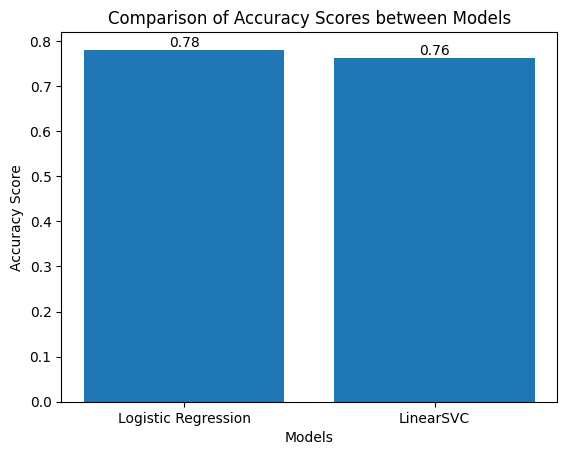

In [51]:
import matplotlib.pyplot as plt

# Accuracy scores
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
test_accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Bar graph
models = ['Logistic Regression', 'LinearSVC']
accuracy_scores = [test_accuracy_lr, test_accuracy_svc]

plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')

# Add value labels to the bars
for i, v in enumerate(accuracy_scores):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.title('Comparison of Accuracy Scores between Models')
plt.show()

Upon evaluation, the Logistic Regression model achieved an accuracy of 78%, while the Linear SVC model had a slightly lower accuracy of 76%. Therefore, the Logistic Regression model outperforms the Linear SVC model in terms of accurately predicting high-traffic recipes.

# Recommendation for future action:

- We suggest to deploy the Logistic Regression model to the recent recipes

- Both models suggest that category is the main feature affecting the traffic. Therefore, we should try to increase the number of categories and create more meaningful features from existing variables.
 
- To improve the accuracy, we should collect more information, such as more details about time to cost, cost per servings, and also the combination of ingredients.
